In [6]:
import umap
from umap import UMAP
import pandas as pd
#pip install umap
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Proof of Concept (UMAP)

In [33]:
features = df.loc[:, :' Equity to Liability']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

In [34]:
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['Bankrupt?'], labels={'color': 'Bankrupt?'}
)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['Bankrupt?'], labels={'color': 'Bankrupt?'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [9]:
X = df.loc[:, df.columns != 'Bankrupt?']
y = df['Bankrupt?']

### Not Standardized

In [22]:
import umap  # pip install umap-learn
import matplotlib.pyplot as plt
import numpy as np

manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

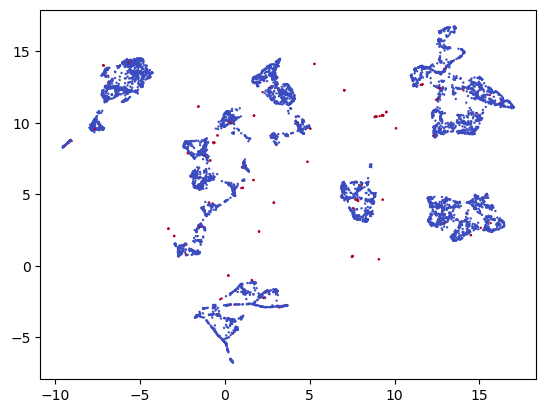

In [25]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,cmap = "coolwarm", s=0.5);


### Normalized

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

manifold_normalized = umap.UMAP().fit(X_normalized, y)
X_reduced_normalized = manifold_normalized.transform(X)


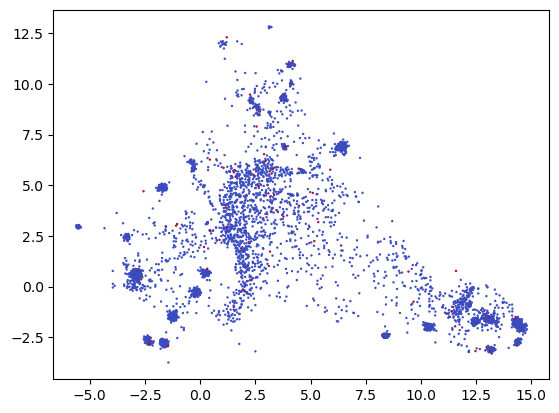

In [28]:
plt.scatter(X_reduced_normalized[:, 0], X_reduced_normalized[:, 1], c=y,cmap="coolwarm", s=0.5);

### Standardized

In [29]:
scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

manifold_standardized = umap.UMAP().fit(X_standardized, y)
X_reduced_standardized = manifold_standardized.transform(X)


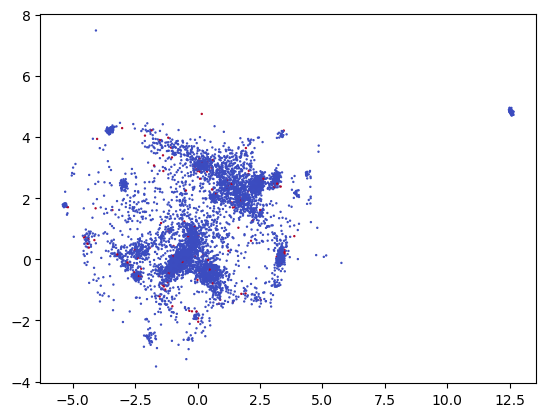

In [30]:
plt.scatter(X_reduced_standardized[:, 0], X_reduced_standardized[:, 1], c=y, cmap = "coolwarm",s=0.5);

## LDA

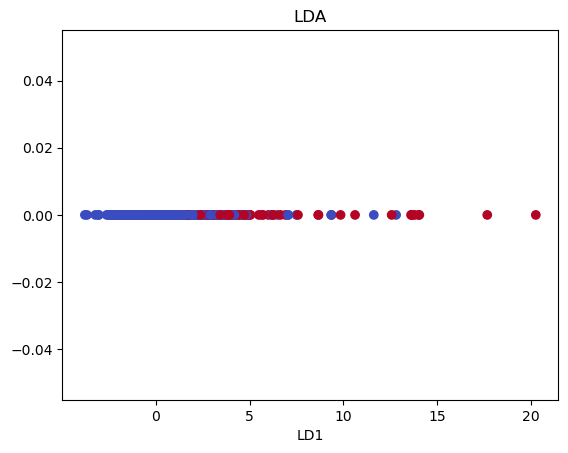

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Extract features and target from the data frame
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)

# Transform the data to the LDA space
X_lda = lda.transform(X)

# Plot the transformed data
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm')
plt.title("LDA")
plt.xlabel('LD1')
plt.show()